# PCA (Principal Component Analysis)

### 주성분을 통해 데이터셋의 차원을 줄여 보다 빠르게 분석
(여기서, 주성분은 공분산의 아이겐벡터)

#### 다음과 같은 순서로 MNIST Data 분석

0. Load the MNIST data and Normalize
1. Get the Covariance Matrix
2. Get the Eigen Values, Eigen Vectors of Covariance Matrix
3. Project Dataset into Eigen space
4. Analysis



## 0. Load the MNIST Data and Normalize

MNIST dataset size (70000, 784)

- \# sample: 70000
- \# size: 28 * 28 image with 1 channel 
- \# Training set: 49000
- \# Testing set: 21000

In [49]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=2/7)

print(X_tr.shape, X_ts.shape)
print(y_tr)


# Normalize
mean = np.mean(X_tr, axis=0)
std = np.std(X_tr, axis=0)
X_tr = (X_tr-np.tile(mean,[X_tr.shape[0],1]))/np.tile(std,[X_tr.shape[0],1])
X_tr[np.isnan(X_tr)] = 0

(50000, 784) (20000, 784)
['3' '1' '2' ... '5' '2' '7']


/Users/mac/miniconda3/envs/yt/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


## 1. Get the Covariance Matrix

- np.cov 함수 사용
- intput: (784, 50000): X_tr.T
- output: (784, 784) 
- row 별로 공분산을 구하기 때문에 data를 transpose시킨 상태로 입력(아래 참조)

```python
X = X_tr.T
std = np.std(X, axis=1)

rows = X_tr.T.shape[0]
cov = np.zeros([rows, rows],dtype=np.float)

for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        cov[i][j] = std[i]*std[j]
```


In [46]:
cov = np.cov(X_tr.T)
print(cov.shape)

(784, 784)


## 2. Get the Eigen Values and Eigen Vectors

- np.linalg.eig 함수 사용
- input: (784,784) - Covariance Matrix
- output
    - (784,) - Eigen Values (sorted by decrease)
    - (784,784) - Eigen Vectors (consistenet with col indices of the eigen value)

- 주의할 점은 eigen vectors의 아웃풋이 col형태로 나오므로 (eigen value, eigen vector) pair는 다음 코드 참조


(784,) (784, 784)


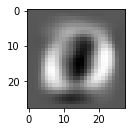

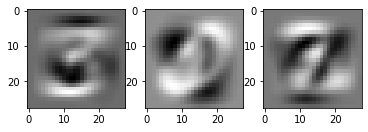

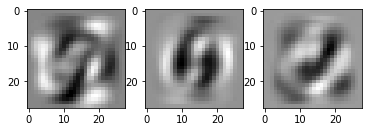

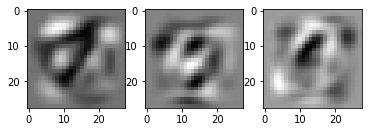

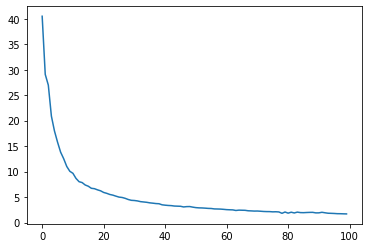

In [47]:
import matplotlib.pyplot as plt

# get the eigen values and eigen vectors
eigval, eigvec = np.linalg.eig(cov)
print(eigval.shape, eigvec.shape)

# plot the leading 10 eigvector images
vec = eigvec.reshape((28,28,-1))
for i in range(10):
    plt.subplot(1,3,(i%3)+1)
    plt.imshow(vec[...,i].real,cmap='gray')
    if(i%3 == 0): plt.show()
 

# plot the leading 100 eigen value
val = eigval.flatten()[:100]
x = np.arange(len(val))
plt.plot(x,val)
plt.show()


## 3. Project Dataset into n-D Eigen space

- np.matmul 함수사용
- new_Tr = (X_tr)(n_eigvec.T)


(50000, 784) (784, 784) (50000, 2)


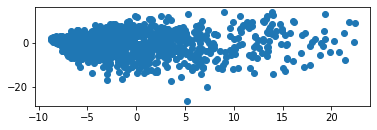

In [53]:
n = 2

n_eigvec = eigvec.T[:n]
new_tr = np.matmul(X_tr, n_eigvec.T)

print(X_tr.shape, eigvec.shape, new_tr.shape)

n_plot = 1000
new_tr = new_tr[:n_plot]
y_tr = y_tr[:n_plot]

plt.subplot(2,1,1)
plt.scatter(new_tr[...,0],new_tr[...,1])
plt.show()

## 4. Analysis

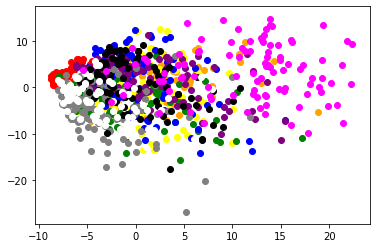

In [63]:
label1 = new_tr[np.where(y_tr=='1')]
label2 = new_tr[np.where(y_tr=='2')]
label3 = new_tr[np.where(y_tr=='3')]
label4 = new_tr[np.where(y_tr=='4')]
label5 = new_tr[np.where(y_tr=='5')]
label6 = new_tr[np.where(y_tr=='6')]
label7 = new_tr[np.where(y_tr=='7')]
label8 = new_tr[np.where(y_tr=='8')]
label9 = new_tr[np.where(y_tr=='9')]
label0 = new_tr[np.where(y_tr=='0')]
plt.scatter(label1[...,0],label1[...,1],c='red')
plt.scatter(label2[...,0],label2[...,1],c='orange')
plt.scatter(label3[...,0],label3[...,1],c='yellow')
plt.scatter(label4[...,0],label4[...,1],c='green')
plt.scatter(label5[...,0],label5[...,1],c='blue')
plt.scatter(label6[...,0],label6[...,1],c='purple')
plt.scatter(label7[...,0],label7[...,1],c='gray')
plt.scatter(label8[...,0],label8[...,1],c='black')
plt.scatter(label9[...,0],label9[...,1],c='white')
plt.scatter(label0[...,0],label0[...,1],c='magenta')
plt.show()

## Epiloge. test N-dim Eigen Space 

(50000, 784) (784, 784) (50000, 5)


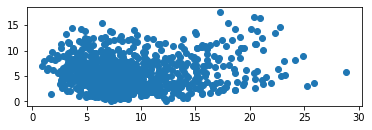

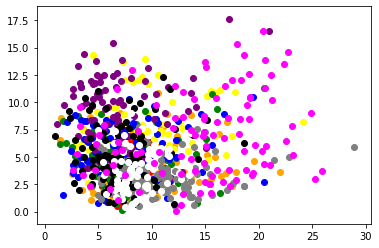

In [71]:
n = 5

n_eigvec = eigvec.T[:n]
new_tr = np.matmul(X_tr, n_eigvec.T)

print(X_tr.shape, eigvec.shape, new_tr.shape)

n_plot = 1000
new_tr = new_tr[:n_plot]
y_tr = y_tr[:n_plot]

new_tr[...,0] = np.linalg.norm(new_tr[...,:3],axis=1)
new_tr[...,1] = np.linalg.norm(new_tr[...,3:],axis=1)


plt.subplot(2,1,1)
plt.scatter(new_tr[...,0],new_tr[...,1])
plt.show()

label1 = new_tr[np.where(y_tr=='1')]
label2 = new_tr[np.where(y_tr=='2')]
label3 = new_tr[np.where(y_tr=='3')]
label4 = new_tr[np.where(y_tr=='4')]
label5 = new_tr[np.where(y_tr=='5')]
label6 = new_tr[np.where(y_tr=='6')]
label7 = new_tr[np.where(y_tr=='7')]
label8 = new_tr[np.where(y_tr=='8')]
label9 = new_tr[np.where(y_tr=='9')]
label0 = new_tr[np.where(y_tr=='0')]
plt.scatter(label1[...,0],label1[...,1],c='red')
plt.scatter(label2[...,0],label2[...,1],c='orange')
plt.scatter(label3[...,0],label3[...,1],c='yellow')
plt.scatter(label4[...,0],label4[...,1],c='green')
plt.scatter(label5[...,0],label5[...,1],c='blue')
plt.scatter(label6[...,0],label6[...,1],c='purple')
plt.scatter(label7[...,0],label7[...,1],c='gray')
plt.scatter(label8[...,0],label8[...,1],c='black')
plt.scatter(label9[...,0],label9[...,1],c='white')
plt.scatter(label0[...,0],label0[...,1],c='magenta')
plt.show()